# 고양이 스티커 적용

## 이미지 불러오기

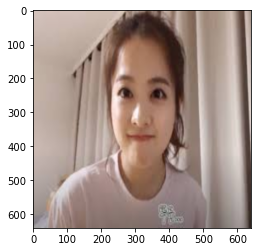

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = 'images/park.jpeg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640 x 640 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## dlib FaceDetector

rectangles[[(171, 171) (438, 439)]]


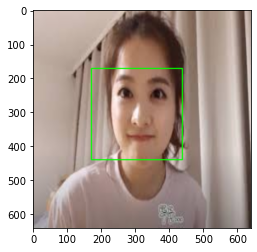

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## dlib facelandmark

In [3]:
import dlib
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_landmarks)

[[(230, 262), (229, 291), (232, 320), (236, 350), (243, 378), (254, 402), (270, 423), (291, 437), (315, 441), (339, 439), (361, 428), (380, 412), (397, 390), (408, 363), (414, 334), (418, 304), (420, 273), (241, 215), (252, 199), (269, 195), (287, 198), (301, 211), (334, 211), (353, 201), (373, 200), (392, 207), (403, 226), (318, 248), (317, 274), (316, 299), (315, 323), (295, 336), (304, 341), (315, 346), (327, 341), (338, 336), (256, 247), (266, 235), (281, 237), (293, 254), (279, 256), (264, 254), (345, 255), (357, 239), (373, 238), (384, 251), (374, 257), (359, 258), (277, 370), (292, 366), (305, 364), (316, 367), (327, 364), (341, 367), (357, 371), (341, 380), (328, 385), (316, 386), (305, 385), (292, 380), (284, 371), (305, 374), (315, 375), (327, 374), (350, 371), (327, 371), (316, 373), (306, 371)]]


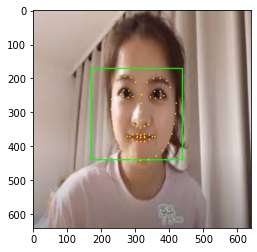

In [4]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = (landmark[30][0] - landmark[36][0])*3
    h = (landmark[48][1] - landmark[2][1])*2
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(x,y) : (315,323)
(w,h) : (177,100)


In [12]:
sticker_path = 'images/catnose.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape)

(100, 177, 3)


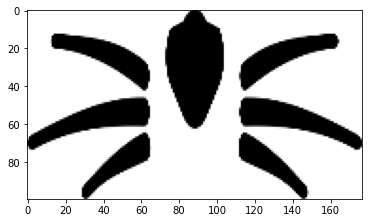

In [13]:
plt.imshow(img_sticker)

In [14]:
refined_x = x-w//2
refined_y = y-h//2
print('(x,y):(%d, %d)'%(refined_x, refined_y))

(x,y):(227, 273)


In [15]:
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(100, 177, 3)


In [16]:
img_sticker.shape

(100, 177, 3)

In [17]:
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

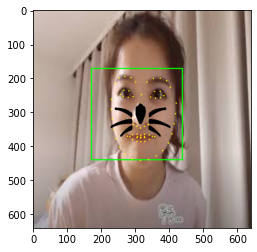

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

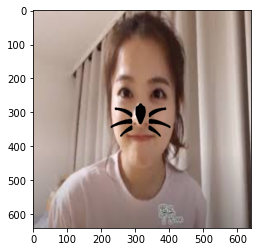

In [19]:
sticker_area = img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()